In [1]:
with open("Flickr8k.token.txt") as f:
    captions=f.read()

In [2]:
captions=captions.split("\n")

In [3]:
len(captions)

40460

In [4]:
### Data cleaning -- removing punctuations ,number and converting sentence to lower
import re
def data_cleaning(sentence):
    sentence=sentence.lower()
    sentence=(re.sub("[^a-z]+"," ",sentence))
    sentence=[i for i in sentence.split() if len(i)>1]
    sentence=" ".join(sentence)
    return sentence

In [5]:
####dictionary that will map image to captions
dic={}
for caption in captions:
    cap=caption.split("\t")[1]
    img=caption.split("\t")[0].split(".jpg")[0]
    if dic.get(img)==None:
        dic[img]=[]
    else:
        cap=data_cleaning(cap)
        cap="startseq "+cap+" endseq"
        dic[img].append(cap)
    
    
    

In [6]:
dic

{'1000268201_693b08cb0e': ['startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and tri colored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl is sitting in front of large painted rainbow endseq',
  'startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq',
  'startseq there is girl with pigtails sitting in front of rainbow painting endseq',
  'startseq young girl with pigtails painting ou

In [7]:
img_path="Flicker8k_Dataset/"

import cv2
import matplotlib.pyplot as plt
img=cv2.imread(img_path+"1000268201_693b08cb0e.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
dic["1000268201_693b08cb0e"]

['startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [9]:
with open("description.txt",'w') as f:
    f.write(str(dic))

In [10]:
with open("description.txt",'r') as f:
    description=f.read()

In [11]:
import json
description=description.replace("'","\"")
description=json.loads(description)

In [12]:
description.values()

dict_values([['startseq girl going into wooden building endseq', 'startseq little girl climbing into wooden playhouse endseq', 'startseq little girl climbing the stairs to her playhouse endseq', 'startseq little girl in pink dress going into wooden cabin endseq'], ['startseq black dog and tri colored dog playing with each other on the road endseq', 'startseq black dog and white dog with brown spots are staring at each other in the street endseq', 'startseq two dogs of different breeds looking at each other on the road endseq', 'startseq two dogs on pavement moving toward each other endseq'], ['startseq little girl is sitting in front of large painted rainbow endseq', 'startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq', 'startseq there is girl with pigtails sitting in front of rainbow painting endseq', 'startseq young girl with pigtails painting outside in the grass endseq'], ['startseq man lays on the bench to which white dog is

# VOCAB


In [13]:
vocab=set()
for i in description.keys():
    [vocab.update(sentence.split()) for sentence in description[i]] 

In [14]:
print(len(vocab))

7678


In [15]:
##total number of words
total_words=[]
for i in description.keys():
    [total_words.append(word) for sentence in description[i] for word in sentence.split()] 

In [16]:
len(total_words)

363840

In [17]:
import collections

In [18]:
counter=collections.Counter(total_words)


In [19]:
counter=dict(counter)

In [20]:
len(counter)

7678

In [21]:
threshold=8
total_words=[]
for word in counter:
    if counter[word]>threshold:
        total_words.append(word)
        
        

In [22]:
len(total_words)

1847

# TEST TRAIN PREPARATION


In [23]:
with open("Flickr_8k.trainImages.txt") as f:
    train_img=f.read()
with open("Flickr_8k.testImages.txt") as f:
    test_img=f.read()    
    


In [24]:
test=[img.split(".")[0] for img in test_img.split("\n")[:-1]]
train=[img.split(".")[0] for img in train_img.split("\n")[:-1]]

In [25]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
model_img=ResNet50(weights="imagenet",input_shape=(224,224,3))
model_img.summary()

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [26]:
from keras.models import Model
model_img=Model(model_img.input,model_img.layers[-2].output)

In [27]:
from keras.applications.resnet50 import preprocess_input
import numpy as np

In [28]:
from keras.preprocessing import image
def preprocess_img(img):
    img=image.load_img(img,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    ##to develop compatibility of images with resnet eg.normalisation etc.
    img=preprocess_input(img)
    return img
    

In [29]:
def encode_img(img):
    img=preprocess_img(img)
    vector=model_img.predict(img)
    return vector

In [30]:
preprocess_img("Flicker8k_Dataset/1000268201_693b08cb0e.jpg").shape

(1, 224, 224, 3)

In [31]:
from time import time
####encoding of the image
start=time()
encoding_train={}
for i,img_id in enumerate(train):
    img_path="Flicker8k_Dataset/"+img_id+".jpg"
    encoding_train[img_id]=encode_img(img_path)
end=time()    
print("time taken: ",end-start)

time taken:  2367.3719067573547


In [32]:
!mkdir saved

A subdirectory or file saved already exists.


In [33]:
##serialisation
import pickle
with open("saved/encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [34]:
from time import time
####encoding of the image
start=time()
encoding_test={}
for i,img_id in enumerate(test):
    img_path="Flicker8k_Dataset/"+img_id+".jpg"
    encoding_test[img_id]=encode_img(img_path)
end=time()   
print("time taken: ",end-start)
##serialisation
import pickle
with open("saved/encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

time taken:  417.46000504493713


In [35]:
word_to_idx={}
idx_to_word={}
for idx,word in enumerate(total_words):
    word_to_idx[word]=idx+1 ###cannot keep index 0
    idx_to_word[idx+1]=word

In [36]:
len(word_to_idx)

1847

In [37]:
###finding maximum length of the caption
maxlen=0
for key in description.keys():
    for sentence in description[key]:
        maxlen=max(maxlen,len(sentence.split()))
            

In [38]:
print(maxlen)

35


# Word embeddings


In [39]:
with open("glove.6B.50d.txt",encoding="utf8") as f:
    f=f.read()

In [40]:
embedding={}
for i in f.split("\n"):
    try:
        word=i.split()[0]
        vector=np.array(i.split()[1:],dtype='float')
    except:
        pass
    
    embedding[word]=vector
    

In [41]:
len(vocab)

7678

In [42]:
##embedding of size 50 each
embedding_matrix=np.zeros((len(vocab)+1,50))
for word,idx in word_to_idx.items():
    try:
        embedding_matrix[idx]=embedding[word]
    except:
        pass
    
        

In [43]:
len(vocab)

7678

In [44]:
maxlen

35

In [45]:
###Model Architecture

In [46]:
from keras.layers import Input,Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add
input_img_features=Input(shape=(2048,))
inp_img1=Dropout(0.3)(input_img_features)
inp_img2=Dense(256,activation='relu')(inp_img1)

input_caption=Input(shape=(maxlen,))
embed=Embedding(input_dim=(len(vocab)+1),mask_zero=True,output_dim=50)(input_caption)
input_cap=Dropout(0.3)(embed)
input_3=LSTM(256)(input_cap)

decoder1=add([inp_img2,input_3])
output=Dense(256,activation="relu")(decoder1)
outputs=Dense((len(vocab)+1),activation="softmax")(output)

model=Model(inputs=[input_img_features,input_caption],outputs=outputs)
model.summary()
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False
model.compile(loss="binary_crossentropy",optimizer="adam")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 35, 50)       383950      input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [47]:
model

In [48]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
def data_generator(batch_size,encoding_train,maxlen,word_to_idx):
    x1=[]
    x2=[]
    y=[]
    n=0
    for img_id in train:
        img_vector=encoding_train[img_id]
        for caption in dic[img_id]:
            seq=[word_to_idx[word] for word in caption.split() if word in word_to_idx]
            for i in range(1,len(seq)):
                x1.append(img_vector.reshape(2048,))
                par_cap=pad_sequences([seq[0:i]],maxlen=maxlen,value=0,padding="post")[0]
                x2.append(par_cap)
                target=to_categorical([seq[i]],num_classes=len(vocab)+1)[0]
                y.append(target)
        n+=1        
        if(n==batch_size):
            yield[[np.array(x1),np.array(x2)],np.array(y)]
            
            x1=[]
            x2=[]
            y=[]
            n=0          
        
    


# Training of Model

In [49]:
batch_size=3
epoch=20
for i in range(epoch):
    generator=data_generator(batch_size,encoding_train,maxlen,word_to_idx)
    model.fit_generator(generator,epochs=1,verbose=1,steps_per_epoch=(len(train)//(batch_size)))
    model.save("model.h5")  
    
    

Epoch 1/1
2000/2000 [==============================] - 704s 352ms/step - loss: 7.4779e-04
Epoch 1/1
2000/2000 [==============================] - 674s 337ms/step - loss: 6.2904e-04
Epoch 1/1
2000/2000 [==============================] - 683s 342ms/step - loss: 5.8453e-04
Epoch 1/1
2000/2000 [==============================] - 771s 386ms/step - loss: 5.5642e-04
Epoch 1/1
2000/2000 [==============================] - 816s 408ms/step - loss: 5.3586e-04
Epoch 1/1
2000/2000 [==============================] - 775s 388ms/step - loss: 5.2017e-04
Epoch 1/1
2000/2000 [==============================] - 737s 368ms/step - loss: 5.0712e-04
Epoch 1/1
2000/2000 [==============================] - 708s 354ms/step - loss: 4.9632e-04
Epoch 1/1
2000/2000 [==============================] - 770s 385ms/step - loss: 4.8731e-04
Epoch 1/1
2000/2000 [==============================] - 718s 359ms/step - loss: 4.7952e-04
Epoch 1/1
2000/2000 [==============================] - 707s 354ms/step - loss: 4.7235e-04
Epoch 1/1


NameError: name 'load_model' is not defined

In [50]:
from keras.models import load_model
model=load_model("model.h5")

# Predictions

In [88]:
def predict_caption(idx,img_vec):
    caption="startseq"
    output=None
    for i in range(maxlen):
        seq=[word_to_idx[word] for word in caption.split()]
        par_cap=pad_sequences([seq],maxlen=maxlen,value=0,padding="post")
        y_pred=model.predict([img_vec,par_cap])
        y_pred=y_pred.argmax()
        output=idx_to_word[y_pred]
        caption+=" "+output
        if(output=="endseq"):        
            print(" ".join(caption.split()[1:-1]))
            break
          
        
        

young boy is climbing off rock wall


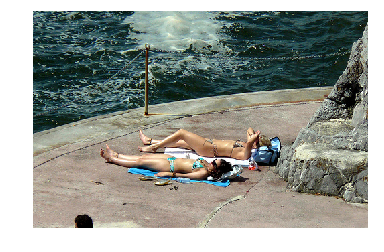

dog jumping over wheel ramp


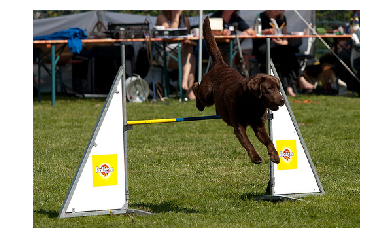

two people are sitting on the side of line of dogs


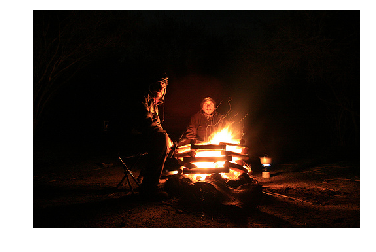

young boy in red shirt is running through the field


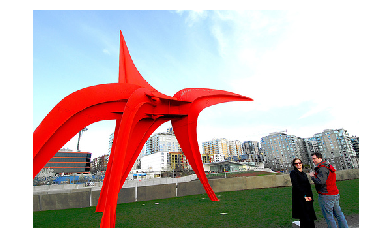

man with purple coat and leather is holding camera


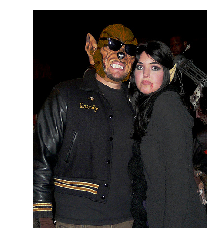

man sits at desk with shopping


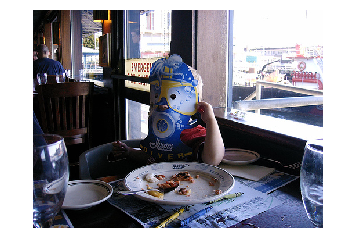

girl in pink coat is watching


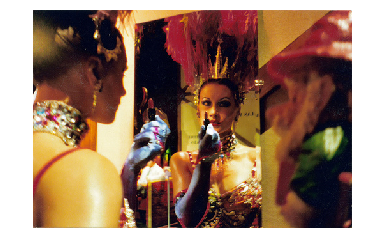

woman with white beard and white hat is sitting on the edge of green chair


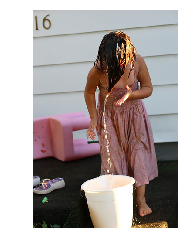

dog jumps to get tennis ball


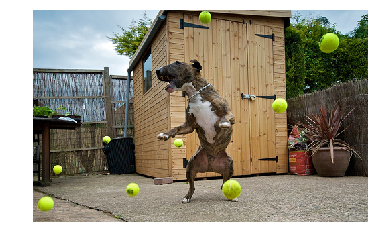

little girl in red shirt and white shirt playing on playground


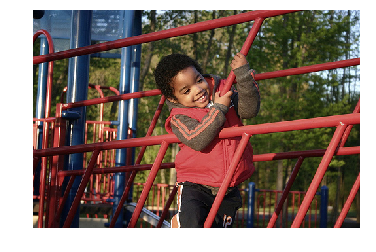

In [91]:
for i in range(10):
    idx=np.random.randint(0,1000)
    value=list(encoding_test.keys())[idx]
    img_vec=encoding_test[value]
    predict_caption(idx,img_vec)
    i=plt.imread("Flicker8k_Dataset/"+value+".jpg")
    plt.imshow(i)
    plt.axis("off")
    plt.show()


girl in white dress crouches on the street


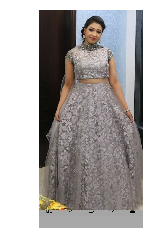

In [99]:
img_vec=encode_img("Screenshot_20190909-112925.jpg")
predict_caption(idx,img_vec)
i=plt.imread("Screenshot_20190909-112925.jpg")
plt.imshow(i)
plt.axis("off")
plt.show()



girl in green shirt and jeans is standing in front of some rocks


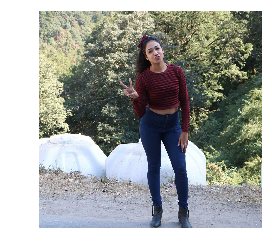

In [100]:
img_vec=encode_img("Screenshot_20191003-221226__01.jpg")
predict_caption(idx,img_vec)
i=plt.imread("Screenshot_20191003-221226__01.jpg")
plt.imshow(i)
plt.axis("off")
plt.show()


two people are standing in front of wooden bench


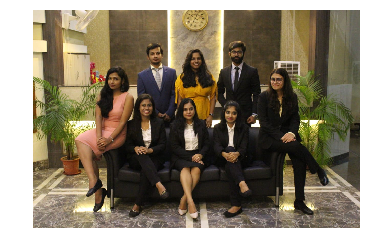

In [101]:
img_vec=encode_img("IMG-20190828-WA0008.jpg")
predict_caption(idx,img_vec)
i=plt.imread("IMG-20190828-WA0008.jpg")
plt.imshow(i)
plt.axis("off")
plt.show()

young boy is sitting in the hay


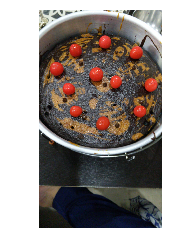

In [103]:
img_vec=encode_img("IMG-20191003-WA0000.jpg")
predict_caption(idx,img_vec)
i=plt.imread("IMG-20191003-WA0000.jpg")
plt.imshow(i)
plt.axis("off")
plt.show()